<h1><center><font size = '6'>Python Project : Loan EMI Calculator</fornt size = '6'></center></h1>

In [3]:
import pandas as pd
import numpy as np

### 1.    Let’s calculate the Home Loan EMI now using Python code. Principal Amount 50Lakhs, Rate of interest 8%, and Loan repayment tenure is 15 years. Find the EMI to be paid?

In [16]:
p = float(input("Enter The Principal Amount: "))
r = float(input("Enter The Interest Rate: "))
n = int(input("Enter The No. of Years: "))

# Now let's calculate the monthly interest rate.
irm = r/(12*100)

# Now let's convert years into months.
nmy = n*12

# Now the monthly EMI is;
emi = (p*irm*(1+irm)**nmy)/(((1+irm)**nmy) - 1)

print("The Calculated Monthly EMI is: ", round(emi,2))

Enter The Principal Amount: 5000000
Enter The Interest Rate: 8
Enter The No. of Years: 15
The Calculated Monthly EMI is:  47782.6


### 2.    If the interest rate increases to 10%, and you cannot pay more than 30,000 as EMI, find the maximum amount of Loan you can take/afford for the same period?

In [17]:
emi = float(input("Enter The EMI You Can Pay: "))
r = float(input("Enter The Interest Rate: "))
n = int(input("Enter The No. of Years: "))

# Now let's calculate the monthly interest rate.
irm = r/(12*100)

# Now let's convert years into months.
nmy = n*12

# Now the monthly EMI is;
p = (emi * (((1+irm)**nmy) - 1)) / (irm*(1+irm)**nmy)

print("The Maximum Amount of Loan The Person Can Get: ", round(p,2))

Enter The EMI You Can Pay: 30000
Enter The Interest Rate: 10
Enter The No. of Years: 15
The Maximum Amount of Loan The Person Can Get:  2791723.16


### 3.    For the Que 1. what is the total interest paid by you year-wise (from the 1st year to the 15th year). Also, what is the total cumulative interest paid by you in 15 years?

In [5]:
!pip install numpy_financial

In [1]:
# Importing numpy financial functions
import numpy_financial as npf
npf.__version__

'1.0.0'

In [7]:
# Checking the numpy financial functions
[function for function in dir(npf) if not function.startswith('_')]

['fv', 'ipmt', 'irr', 'mirr', 'nper', 'npv', 'pmt', 'ppmt', 'pv', 'rate']

#### Part - 1

In [52]:
# For the Que 1. what is the total interest paid by you year-wise (from the 1st year to the 15th year).

p = float(input("Enter The Principal Amount: "))
r = float(input("Enter The Interest Rate: "))
n = int(input("Enter The No. of Years: "))

# Total yearly int of 15 years

t1 = [i for i in range(1,n+1,1)]

l1 = []

for i in t1:
    x = npf.ipmt((r/100),i,n,p*(-1))
    l1.append(x)
    
print(type(l1))

yr_emi = pd.DataFrame({'Year':[i for i in range(1,16,1)],'Yearly Total Installment Amount': l1})
yr_emi['Yearly Total Installment Amount'] = yr_emi['Yearly Total Installment Amount'].apply(lambda x: '{:.2f}'.format(x))
yr_emi.head(15)

Enter The Principal Amount: 5000000
Enter The Interest Rate: 8
Enter The No. of Years: 15
<class 'list'>


,Year,Yearly Total Installment Amount
0,1,400000.00
1,2,385268.18
2,3,369357.82
3,4,352174.63
4,5,333616.78
5,6,313574.30
6,7,291928.43
7,8,268550.89
8,9,243303.14
9,10,216035.57


#### Part - 2

In [12]:
# The total cumulative interest paid in 15 years?

p = float(input("Enter The Principal Amount: "))
r = float(input("Enter The Interest Rate: "))
n = int(input("Enter The No. of Years: "))

t2 = [i for i in range(1,(n*12)+1,1)]

l2 = []

for i in t2:
    y = npf.ipmt((r/1200),i,(n*12),p*(-1)) 
    l2.append(y)
    
print(type(l2))  

print("Hence, The Total Amount of Cumulative Interest of 15 Years Is: %0.2f"%np.array(l2).sum())
emi_tab = (pd.DataFrame({'Year':[i for i in range(1,(n*12)+1,1)],'Monthly_Int':l2}))
emi_tab.head()
np.cumsum(emi_tab['Monthly_Int'])

Enter The Principal Amount: 5000000
Enter The Interest Rate: 8
Enter The No. of Years: 15
<class 'list'>
Hence, The Total Amount of Cumulative Interest of 15 Years Is: 3600868.76


0      33333.333333333336
1            66570.338194
2            99710.372393
3           132752.789457
4           165696.938608
              ...        
175        3597725.235161
176        3598978.481115
177        3599921.531347
178        3600552.317886
179        3600868.758973
Name: Monthly_Int, Length: 180, dtype: object

### 4.    For the Que 1., in how many months would you have paid atleast 50% of the Principal amount.

In [4]:
p = float(input("Enter The Principal Amount: "))
r = float(input("Enter The Interest Rate: "))
n = int(input("Enter The No. of Years To Pay Back The Entire Loan Amount: "))
paid = float(input("Paid Percentage Share (numerics only): ")) #In this case it is 50% of the principal amount

# Calculating the monthly interest rate...
r = r/(12*100)

# Converting the tenure into months...
n = n*12

# Checking the monthly emi using the emi formula...
emi = npf.pmt(r,n,p*(-1))
print("Monthly EMI amount: ",round(emi,2))

# Breaking the monthly amortization details...
l1 = []
l2 = []
for i in range(1,n+1,1):
    y = float(npf.ipmt(r,i,n,p*(-1)))
    z = float(npf.ppmt(r,i,n,p*(-1)))
    l1.append(y)
    l2.append(z)

# creating the dataframe of amortization...    
dt = pd.DataFrame({'Months':[i for i in range(1,n+1)],'IPMT':l1,'PPMT':l2})
dt['IPMT'] = dt['IPMT'].apply(lambda x: '{:.2f}'.format(x)).astype(float)
dt['PPMT'] = dt['PPMT'].apply(lambda x: '{:.2f}'.format(x)).astype(float)
dt['EMI'] = dt['IPMT'] + dt['PPMT']

# Calculating the cumulative sum of the monthly-EMIs...
c_emi = np.cumsum(dt['PPMT']).tolist()

### Finally the time it would take to repay 50% of the principle amount...
a = []

for j,k in enumerate(c_emi):
    if k <= p * paid:
        a.append(j)
print(a)
print("So,the time it would take to repay 50% of the principle is: ",
      len(a),"months. And in",len(a),
      "months, the repaid amount of the principal amount will be :",
      round(c_emi[len(a)],2))

Enter The Principal Amount: 5000000
Enter The Interest Rate: 8
Enter The No. of Years To Pay Back The Entire Loan Amount: 15
Paid Percentage Share (numerics only): 0.5
Monthly EMI amount:  47782.6
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114]
So,the time it would take to repay 50% of the principle is:  115 months. And in 115 months, the repaid amount of the principal amount will be : 2517258.07


In [5]:
# Full amortization of the loan...
dt['Cumulative_PPMT'] = np.cumsum(dt['PPMT'])
dt['Cumulative_IPMT'] = np.cumsum(dt['IPMT'])
dt['Cumulative_EMI'] = np.cumsum(dt['EMI'])

# sorting the col_names...
dt = dt[['Months','PPMT','IPMT','EMI','Cumulative_PPMT','Cumulative_IPMT','Cumulative_EMI']]
dt.head(10)

,Months,PPMT,IPMT,EMI,Cumulative_PPMT,Cumulative_IPMT,Cumulative_EMI
0,1,14449.27,33333.33,47782.60,14449.27,33333.33,47782.60
1,2,14545.60,33237.00,47782.60,28994.87,66570.33,95565.20
2,3,14642.57,33140.03,47782.60,43637.44,99710.36,143347.80
3,4,14740.19,33042.42,47782.61,58377.63,132752.78,191130.41
4,5,14838.46,32944.15,47782.61,73216.09,165696.93,238913.02
5,6,14937.38,32845.23,47782.61,88153.47,198542.16,286695.63
6,7,15036.96,32745.64,47782.60,103190.43,231287.80,334478.23
7,8,15137.21,32645.40,47782.61,118327.64,263933.20,382260.84
8,9,15238.12,32544.48,47782.60,133565.76,296477.68,430043.44
9,10,15339.71,32442.90,47782.61,148905.47,328920.58,477826.05


In [ ]:
dt.to_csv('/Users/roy_aish/Desktop/git')

<h1><center><font size = '5'>Monthly EMI Visuals</font size = '5'></center></h1>

In [43]:
import matplotlib.pyplot as plt

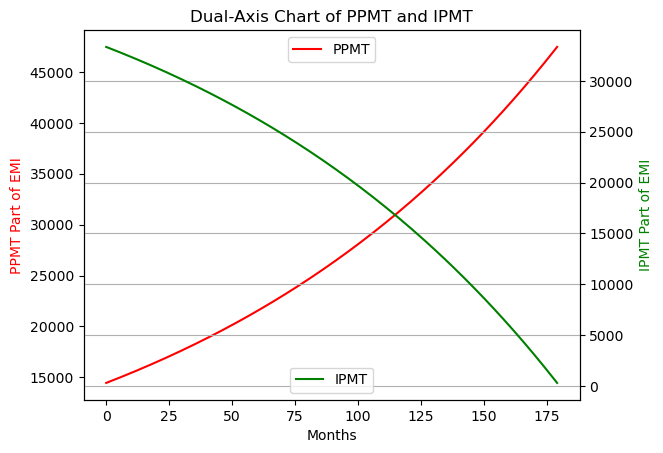

In [44]:
# Dual-Axis Plot of PPMT & IPMT...

# Extracting values for axes...
x = range(len(dt))
y1 = dt['PPMT']
y2 = dt['IPMT']

# First axis...
fig, ax1 = plt.subplots()

# PPMT plot
ax1.plot(x, y1, label='PPMT', color='r')

# Labels...
ax1.set_xlabel('Months')
ax1.set_ylabel('PPMT Part of EMI', color='r')
ax1.set_title('Dual-Axis Chart of PPMT and IPMT')

# Second axis
ax2 = ax1.twinx()

# IPMT plot
ax2.plot(x, y2, label='IPMT', color='g')

# Labels...
ax2.set_ylabel('IPMT Part of EMI', color='g')

# Setting the legend
ax1.legend(loc='upper center')
ax2.legend(loc='lower center')

plt.grid()
plt.show()

Aisharya Roy | [LinkedIn](https://www.linkedin.com/in/aisharya-roy-98a30721a/) | [GitHub](https://github.com/royaish27) | Python Project Hosted By Analytics Vidhya

--- END